In [98]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as plt

In [99]:
df = pd.read_csv('Data/Alcohol_Sales.csv', index_col='DATE', parse_dates=True)
df.index.freq = 'MS'
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [100]:
df.columns = ['sales']

<AxesSubplot:xlabel='DATE'>

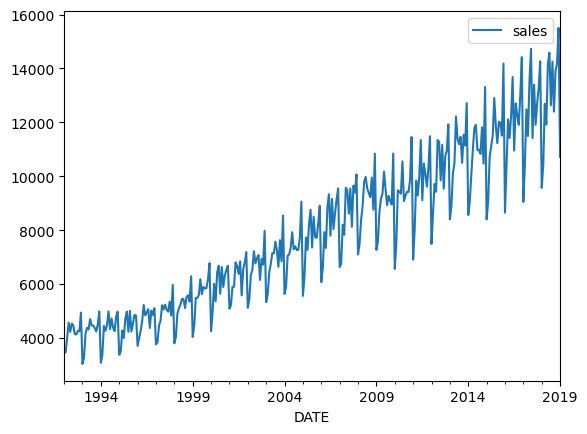

In [101]:
df.plot()

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

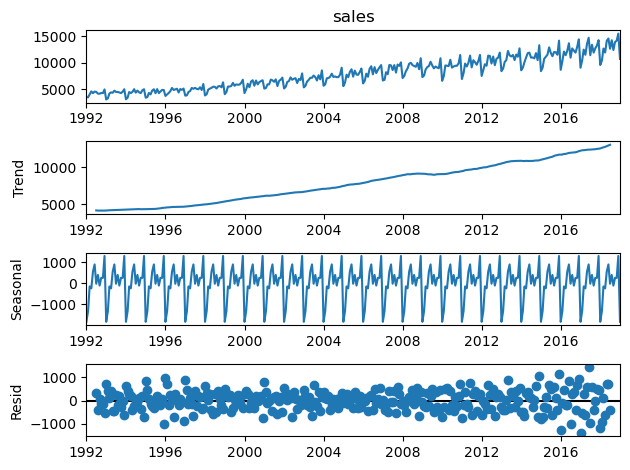

In [103]:
result = seasonal_decompose(df['sales'])
result.plot();

In [104]:
len(df)

325

In [105]:
# 1년치 예측해보기
train = df.iloc[:len(df)-12] 
test = df.iloc[len(df)-12:]

In [106]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [107]:
scaler.fit(train)

MinMaxScaler()

In [108]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

> 케라스에서 시계열 예측: [t1, t2, t3] -> [t4]

In [109]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [110]:
n_input = 3
n_features = 2

generator = TimeseriesGenerator(
    scaled_train, 
    scaled_train,
    length=n_input, 
    batch_size=1)

In [111]:
len(scaled_train), len(generator)

(313, 310)

In [112]:
X, y = generator[0]

In [113]:
X.shape # 가장 먼저 나오는 숫자가 배치사이즈, 그 다음 숫자 n_input

(1, 3, 1)

In [114]:
X # n_input 수가 입력

array([[[0.03658432],
        [0.03649885],
        [0.08299855]]])

In [115]:
y # n_input 수를 바탕으로 예측

array([[0.13103684]])

In [127]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf

In [124]:
n_input = 12 # 12개월치 데이터를 13번쨰 개월 예측
n_features = 1

train_generator = TimeseriesGenerator(
    scaled_train, 
    scaled_train,
    length=n_input, 
    batch_size=1)

In [130]:
model = Sequential()

# 뉴런 숫자를 테스트하면서 조절해야함
model.add(LSTM(150, activation = "relu", input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 150)               91200     
                                                                 
 dense_9 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.fit(train_generator, epochs=25)

Epoch 1/25


2022-12-19 20:35:28.355905: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x2a18eb5e0
2022-12-19 20:35:28.357860: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x2a18eb5e0


NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_3' defined at (most recent call last):
    File "/opt/homebrew/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/homebrew/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/homebrew/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/homebrew/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/k9/3kpzjsgj0j128198fg7_ypfm0000gn/T/ipykernel_74416/1564448675.py", line 2, in <cell line: 1>
      model.fit(train_generator, epochs=25)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      except Exception as e:  # pylint: disable=broad-except
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      `ParameterServerStrategy`. Note that the progress bar is not
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      `tf.data` dataset, and 'steps_per_epoch'
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      you can pass a 2D array with shape
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      to a weight (float) value, used for weighting the loss function
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      """Runs a single training step."""
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      ...   initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
Node: 'StatefulPartitionedCall_3'
Detected at node 'StatefulPartitionedCall_3' defined at (most recent call last):
    File "/opt/homebrew/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/homebrew/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/homebrew/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/homebrew/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/k9/3kpzjsgj0j128198fg7_ypfm0000gn/T/ipykernel_74416/1564448675.py", line 2, in <cell line: 1>
      model.fit(train_generator, epochs=25)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      except Exception as e:  # pylint: disable=broad-except
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      `ParameterServerStrategy`. Note that the progress bar is not
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      `tf.data` dataset, and 'steps_per_epoch'
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      you can pass a 2D array with shape
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      to a weight (float) value, used for weighting the loss function
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      """Runs a single training step."""
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      ...   initial_learning_rate=.01, decay_steps=20, decay_rate=.1)
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
    File "/opt/homebrew/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
Node: 'StatefulPartitionedCall_3'
2 root error(s) found.
  (0) NOT_FOUND:  could not find registered platform with id: 0x2a18eb5e0
	 [[{{node StatefulPartitionedCall_3}}]]
	 [[Func/gradient_tape/sequential_9/lstm_9/while/sequential_9/lstm_9/while_grad/body/_154/input/_464/_84]]
  (1) NOT_FOUND:  could not find registered platform with id: 0x2a18eb5e0
	 [[{{node StatefulPartitionedCall_3}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_20387]

In [134]:
model.history.history.keys()

dict_keys([])

In [136]:
loss = model.history.history['loss']
plt.plot(range(len(loss)), loss)

KeyError: 'loss'

In [ ]:
# 1개 예측
# 12 history --> step 13 예측
first_eval_batch = scaled_train[-12:]

first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

model.predict(first_eval_batch)

In [ ]:
# 반복해서...
test_preds = []

# 12 history --> step 13 예측
first_eval_batch = scaled_train[-n_input:]

# n_input이 12임으로 1로 reshape
current_batch = first_eval_batch.reshape((1, n_input. n_features))

# 테스트 길이만큼 예측하기, 테스트 값하고 비교하기 위해서
for i in range(len(test)):
    # 12시점보다 한 시점 앞선 포인트 예측
    current_pred = model.predict(current_batch)[0]
    test_preds.append(current_pred)
    
    # 현재 배치가 예측값을 포함하도록 업데이트
    # current_batch[:, 1:, :] --> current_batch 모양이 [[[1], [2], [3], ...]] 모양인데, 
    # [:, 1:, :] 이렇게 하면 맨 처음값을 제외하고 나머지 선택, 즉 11개 선택
    # 예측된 값을 붙이는데 [[current_pred]] 요런 형태
    # 붙이는 축는 axis=1, 0,1 번쨰 축에 붙이겠다
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)
    

In [138]:
# 12개 출력 예정
test_preds

NameError: name 'test_preds' is not defined

In [ ]:
# MinMax 정규화를 다시 원래값으로
true_preds = scaler.inverse_transform(test_preds)

In [ ]:
test['Pred'] = true_preds

In [ ]:
test.plot()

In [ ]:
# 모델 저장
model.save('mymodel.h5')

In [139]:
# 모델 불러오기
from keras.models import load_model

In [ ]:
new_model = load_model('mymodel.h5')

In [ ]:
new_model.summary()